In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry
using Statistics

In [2]:
view1 = [1700:5300,5000:10000]
meta1 = Load.slc_meta(master_meta_path);
data1 = Load.slc_data(master_data_path,view1);

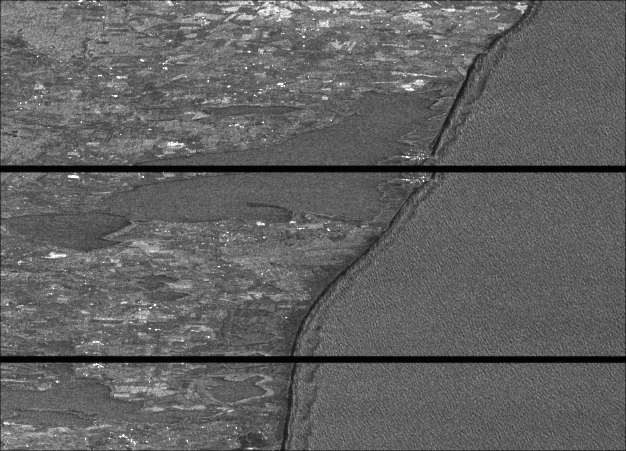

In [3]:
SlcUtil.show_img(data1)

In [4]:
function mosaic_data(data,view,meta)
# Find the burst in the image
start_burst = ceil(Int,(view[1].start)/meta["lines_per_burst"])
end_burst = ceil(Int,(view[1].stop-1)/meta["lines_per_burst"])

#find the overlaps
overlap = meta["lines_per_burst"].+meta["burst_meta"]["first_line_mosaic"][1:end-1] .- meta["burst_meta"]["first_line_mosaic"][2:end]
d_ovelap_m = floor.(Int,overlap .*0.5)
d_ovelap_p = overlap .- d_ovelap_m

# Initialise start line
line_start_burst = 1
# initilise the mosaic view
view_start_line = view[1].start - meta["lines_per_burst"]*(start_burst-1)+ meta["burst_meta"]["first_line_mosaic"][start_burst]-1
view_end_line = view[1].stop

# Check if the first burst have enough line to be included
lines_in_first_burst = 1 + start_burst* meta["lines_per_burst"]-(view[1].start)
if lines_in_first_burst <= d_ovelap_m[start_burst]
    # If not jump to next burst
    start_burst += 1
    # update valuse
    line_start_burst = lines_in_first_burst +1
    view_start_line = meta["burst_meta"]["first_line_mosaic"][start_burst]
end

# Check if the end burst have enough line to be included
lines_in_end_burst = view[1].stop - (end_burst-1)* meta["lines_per_burst"]
if lines_in_end_burst <= d_ovelap_p[end_burst-1]
    # if not skip the end burst
    end_burst -= 1
    view_end_line = end_burst* meta["lines_per_burst"]
end

# Check for single burst
if end_burst == start_burst
    println("To Be made")
end

# Find initilize mosaic with the first burst exept a bit of the end part
line_end_burst = meta["lines_per_burst"]*start_burst-d_ovelap_m[start_burst]-view[1].start
mosaic = data[line_start_burst:line_end_burst,:];

# loop throuth the middle burst and cut out the section needed
for k in (start_burst+1):(end_burst-1)
    line_start_burst = 1+d_ovelap_p[k-1]+(k-1)*meta["lines_per_burst"]-view[1].start
    line_end_burst = meta["lines_per_burst"]*k-d_ovelap_m[k]-view[1].start
    temp = data[line_start_burst:line_end_burst,:]
    # add the result to mosaic
    mosaic = vcat(mosaic,temp)
end

# handle the last burst
line_start_burst = 1+d_ovelap_p[end_burst-1]+(end_burst-1)*meta["lines_per_burst"]-view[1].start
line_end_burst = 1+ view_end_line-view[1].start
temp = data[line_start_burst:line_end_burst,:]
mosaic = vcat(mosaic,temp);

# Make the mosaic view
view_end_line = view_end_line + meta["burst_meta"]["first_line_mosaic"][end_burst]-1- meta["lines_per_burst"]*(end_burst-1)
mosaic_view = (view_start_line:view_end_line,view[2])
    
return mosaic,mosaic_view 
end

mosaic_data (generic function with 1 method)

In [5]:
mosaic,mosaic_view = mosaic_data(data1,view1,meta1)

(Complex{Float64}[-37.0+36.0im -45.0+24.0im … 46.0+16.0im 76.0+47.0im; -95.0-14.0im -58.0-32.0im … -58.0-35.0im -80.0-35.0im; … ; 33.0-77.0im 21.0-127.0im … -10.0-13.0im -1.0+56.0im; -55.0-30.0im -10.0-65.0im … -74.0-6.0im 58.0+33.0im], (1518:4754, 5000:10000))

In [6]:
size(mosaic)

(3237, 5001)

In [7]:
length.(mosaic_view)

(3237, 5001)

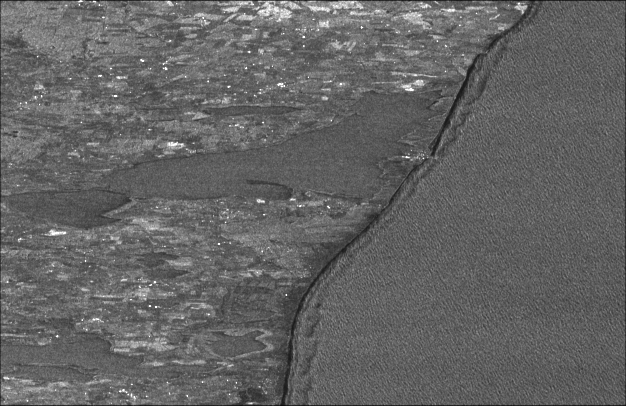

In [8]:
SlcUtil.show_img(mosaic)

In [9]:
line_1 = 2000 
line_1_m = meta1["burst_meta"]["first_line_mosaic"][2]+line_1-meta1["lines_per_burst"]-1
mean(data1[line_1- view1[1].start+1,:] .- mosaic[line_1_m- mosaic_view[1].start+1,:])

0.0 + 0.0im

In [10]:
line_1 = 2900
line_1_m = meta1["burst_meta"]["first_line_mosaic"][2]+line_1-meta1["lines_per_burst"]-1
mean(data1[line_1- view1[1].start+1,:] .- mosaic[line_1_m- mosaic_view[1].start+1,:])

0.0 + 0.0im

In [11]:
line_2 = 3200
line_2_m = meta1["burst_meta"]["first_line_mosaic"][3]+line_2-meta1["lines_per_burst"]*2-1
mean(data1[line_2- view1[1].start+1,:] .- mosaic[line_2_m- mosaic_view[1].start+1,:])

0.0 + 0.0im

In [12]:
line_3 = 5000
line_3_m = meta1["burst_meta"]["first_line_mosaic"][4]+line_3-meta1["lines_per_burst"]*3-1
mean(data1[line_3- view1[1].start+1,:] .- mosaic[line_3_m- mosaic_view[1].start+1,:])

0.0 + 0.0im